# 1. Generate a sample from Poisson (Binomial, Gaussian) distribution 


In [11]:
from scipy.stats import binom, poisson, norm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np


def generate_samples(distribution, **kwargs):
    return distribution.rvs(**kwargs)

from statsmodels.stats.gof import gof_binning_discrete

from scipy import stats


# 2. Test the hypothesis that the parameter is equal to a given value. Take correct and incorrect values and compare the test results


## Биномиальное распределение: проверка с истинным р 

Test passed


(array([  4.,   5.,  15.,  21.,  49., 103., 116.,  81., 145., 178., 131.,
         43.,  64.,  23.,  16.,   2.,   2.,   1.,   0.,   1.]),
 array([25.  , 26.75, 28.5 , 30.25, 32.  , 33.75, 35.5 , 37.25, 39.  ,
        40.75, 42.5 , 44.25, 46.  , 47.75, 49.5 , 51.25, 53.  , 54.75,
        56.5 , 58.25, 60.  ]),
 <BarContainer object of 20 artists>)

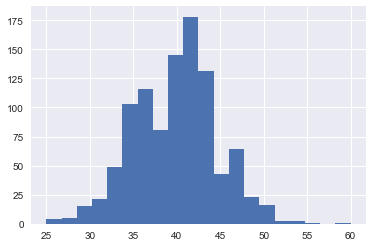

In [12]:
p = 0.4
n = 100
alpha = 0.05
samples = generate_samples(binom, p=p, n=n, size=1000)

freq, exp_freq, histsupp = gof_binning_discrete(samples, binom, (n, p))

(chi_val, p_val) = stats.chisquare(freq, exp_freq)

if p_val >= alpha:
    print('Test passed')
else:
    print('Test failed')
    
plt.hist(samples, bins=20)

##  Биномиальное распределение: проверка с p/2


In [13]:
p = 0.4
n = 100
alpha = 0.05
samples = generate_samples(binom, p=p, n=n, size=1000)

freq, exp_freq, histsupp = gof_binning_discrete(samples, binom, (n, p/2))

(chi_val, p_val) = stats.chisquare(freq, exp_freq)

if p_val >= alpha:
    print('Test passed')
else:
    print('Test failed')


Test failed


## Распределение Пуассона: проверка с истинным $\mu$

Test passed


(array([676.,   0.,   0.,   0., 272.,   0.,   0.,   0.,  42.,   0.,   0.,
          0.,   8.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <BarContainer object of 20 artists>)

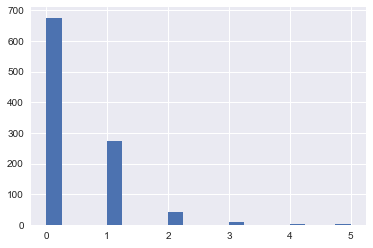

In [14]:
mu = 0.4
alpha = 0.05
samples = generate_samples(poisson, mu=mu, size=1000)

freq, exp_freq, histsupp = gof_binning_discrete(samples, poisson, (mu, ))

(chi_val, p_val) = stats.chisquare(freq, exp_freq)

if p_val >= alpha:
    print('Test passed')
else:
    print('Test failed')
plt.hist(samples, bins=20)

## Распределение Пуассона: проверка с $\frac{\mu}{2}$

In [15]:
mu = 0.4
alpha = 0.05
samples = generate_samples(poisson, mu=mu, size=1000)

freq, exp_freq, histsupp = gof_binning_discrete(samples, poisson, (mu/2, ))

(chi_val, p_val) = stats.chisquare(freq, exp_freq)

if p_val >= alpha:
    print('Test passed')
else:
    print('Test failed')

Test failed


## Нормальное распределение: проверка с истинными значением среднего

Test passed


(array([  1.,   0.,   6.,  14.,  23.,  34.,  73.,  90., 106., 142., 136.,
        103., 106.,  56.,  58.,  26.,  12.,   8.,   5.,   1.]),
 array([-5.73357314, -5.06936541, -4.40515768, -3.74094995, -3.07674222,
        -2.41253449, -1.74832675, -1.08411902, -0.41991129,  0.24429644,
         0.90850417,  1.5727119 ,  2.23691963,  2.90112736,  3.56533509,
         4.22954282,  4.89375055,  5.55795828,  6.22216601,  6.88637375,
         7.55058148]),
 <BarContainer object of 20 artists>)

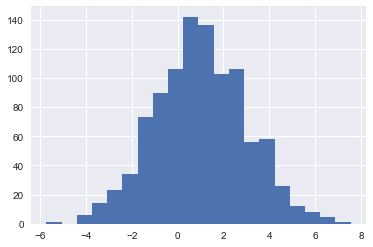

In [16]:
loc = 1
scale = 2
samples = generate_samples(norm, loc=loc, scale=scale, size=1000)

freq, exp_freq, histsupp = gof_binning_discrete(samples, norm, (loc, scale))

(chi_val, p_val) = stats.chisquare(freq, exp_freq)

if p_val >= alpha:
    print('Test passed')
else:
    print('Test failed')
plt.hist(samples, bins=20)

## Нормальное распределение: проверка со значением среднего в два раза меньше истинного

In [17]:
loc = 1
scale = 2
samples = generate_samples(norm, loc=loc, scale=scale, size=1000)

freq, exp_freq, histsupp = gof_binning_discrete(samples, norm, (loc/2, scale))

(chi_val, p_val) = stats.chisquare(freq, exp_freq)

if p_val >= alpha:
    print('Test passed')
else:
    print('Test failed')

Test failed


## Функция лог-правдоподобия (без логарифма маленькие значения, меньше машинной точности)

In [18]:
def norm_likelihood(loc=loc, scale=scale, samples=samples):
    return np.log(norm.pdf(samples, loc=loc, scale=scale)).sum()

In [19]:
norm_likelihood(loc=loc, scale=scale, samples=samples[:10])

-20.3253200567232

# 3. Construct the likelihood function and find the maximum likelihood estimate (MLE) ofthe parameter (for Gaussian only)


## Оценка MLE для среднего

In [20]:
from scipy.optimize import minimize

In [21]:
def neg_likelihood(*args, **kwargs):
    return -norm_likelihood(*args, **kwargs)

In [22]:
from functools import partial
minimize(partial(neg_likelihood, samples=samples[:10], scale=scale), x0=0.5)

      fun: 20.13284215813598
 hess_inv: array([[0.39999998]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([1.39240586])

# 4. Construct the prior distribution (gamma, Gaussian, beta) from this sample


In [23]:
from scipy.stats import beta, binom

In [37]:
p = 0.4
n = 100
size = 1000
samples = generate_samples(binom, p=p, n=n, size=size)

(array([  9.,  40., 125., 250., 247., 166., 136.,  22.,   3.,   2.]),
 array([26. , 29.3, 32.6, 35.9, 39.2, 42.5, 45.8, 49.1, 52.4, 55.7, 59. ]),
 <BarContainer object of 10 artists>)

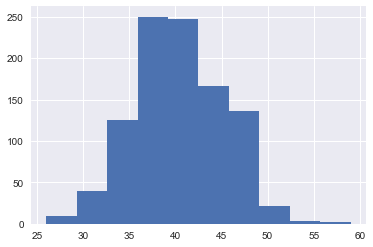

In [38]:
plt.hist(samples)

$$\mathbb{E}\left[x\right] = np$$
$$\mathbb{V}\left[x\right] = np(1-p)$$
$$1-p = \frac{\overline{\sigma}}{\overline{\mu}} \quad \Rightarrow \quad p = 1 -  \frac{\overline{\sigma}}{\overline{\mu}}$$
$$n = \dfrac{\overline{\mu}}{1 - \frac{\overline{\sigma}}{\overline{\mu}}}$$

$$\mathbb{E}(p) = \dfrac{\alpha}{\alpha + \beta} = 1 -  \frac{\overline{\sigma}}{\overline{\mu}}$$
Возьмем в качестве $\beta = y - \alpha,\ \alpha = py $. Если $y = 1$, то $\alpha = p, \quad \beta = 1 - p$.



In [25]:
alpha = 1 - samples.var()/samples.mean()
beta = 1 - alpha

# 5. Generate a sample from Poisson (Gaussian, binomial) distribution (of a different size and with a different parameter value)

In [26]:
new_p = 0.2
new_n = 100
new_size = 1000
new_samples = generate_samples(binom, p=new_p, n=new_n, size=new_size)

# 6. Construct the likelihood function and find the maximum likelihood estimate (MLE) of the parameter 

In [27]:
def likelihood(p, n=n, samples=samples):
    return np.prod(binom.pmf(samples, p=p, n=n))

Правдоподобие такое же, как у $N\cdot n$ испытаний Бернулли
$$L(p;x)= C(n, x) p^x(1-p)^{Nn-\sum x}$$
$$p_{MLE} = \frac{\sum x}{N\cdot n}$$

In [30]:
new_p_mle = new_samples.mean()/new_n
print(new_p_mle)

0.20064


# 7. Construct from the prior and likelihood the posterior distribution (gamma, Gaussian, beta).

In [33]:
from functools import partial
def approx_aposteriori(p, n, samples):
    return likelihood(p, n, samples=samples)*beta.pmf(p, alpha=alpha, beta=beta)

$$f(x|n, \alpha, \beta) = \int_0^1 L(p;x) \pi(p|\alpha, \beta) dp = {n\choose k} \dfrac{B(x + \alpha, n - x + \beta)}{B(\alpha, \beta)}$$

https://en.wikipedia.org/wiki/Beta-binomial_distribution

In [35]:
from scipy.stats import betabinom

# 8. Construct a histogram of the posterior and compare with the histogram of its Gaussian approximation

(array([350.,  97.,  92.,  61.,  57.,  52.,  46.,  56.,  67., 122.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

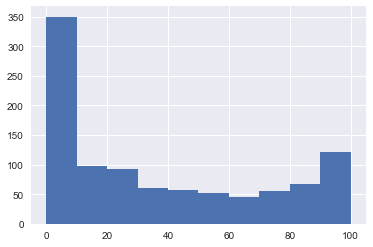

In [41]:
aposteri_samples = generate_samples(betabinom, n=new_n, a=alpha, b=beta, size=new_size)
plt.hist(aposteri_samples)

# 9. Generate a sample from posterior

In [43]:
aposteri_samples

array([ 97,   3,   0,   9,  92,  80,   0,   0,  82,   0,  41,  84,   0,
         1,  51,  14,   3,  90,  71,  90,  25,  97,   8,  33,   3,  32,
        89,   0,  93,   0,   6,  98,   0,  97,   2,  29,  96,   8,  13,
        32,   2,   7,  91,  60,  12, 100,  91,  12,   1,  27,  99,  48,
         2,  99,   4,  98,  36,  10,   2,   4,  14,   4,   0,   3,  13,
        70,  91,  15,   8,  28,  79,   0,   1,  21,   2,   1,   7,  97,
        24,  57,  55,  95,  23,  98,  62,  10,  12,  75,  41,  92,  25,
         0, 100,   3,  25,  12,  30,   5,  76,   0,  24,  15,   4,  11,
        97,   0,   0,  92,  98,  98,  20,   0,  94,   9,  17,   0,  66,
        39,   1,   3,  43,  10,  96,   0,  70,  82, 100,  36,  53,  17,
        64,   5,  82,  28,  93,  31,   0,   5,   0,  35,  70,   1,   1,
        68,  50,  31,   1,  46,  18,  99,  20,  67,  21,  16,   3,   6,
        83,   0,  99,   4,   8,  18,  55,  14,  38,   4,   7,  81,   6,
       100,  74,  12,   0,  92, 100,  51,  10,  53,   5,  86,  5